In [165]:
### Yiğit Şevki
### Kaplan
### 22243810049
### 15.10.2025

In [166]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [167]:
df = pd.read_csv("bodyfat.csv")

In [168]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [170]:
df.drop(['Density'], axis = 1, inplace = True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [172]:
df.shape

(252, 14)

In [173]:
print(df.describe())

          BodyFat         Age      Weight  ...      Biceps     Forearm       Wrist
count  252.000000  252.000000  252.000000  ...  252.000000  252.000000  252.000000
mean    19.150794   44.884921  178.924405  ...   32.273413   28.663889   18.229762
std      8.368740   12.602040   29.389160  ...    3.021274    2.020691    0.933585
min      0.000000   22.000000  118.500000  ...   24.800000   21.000000   15.800000
25%     12.475000   35.750000  159.000000  ...   30.200000   27.300000   17.600000
50%     19.200000   43.000000  176.500000  ...   32.050000   28.700000   18.300000
75%     25.300000   54.000000  197.000000  ...   34.325000   30.000000   18.800000
max     47.500000   81.000000  363.150000  ...   45.000000   34.900000   21.400000

[8 rows x 14 columns]


In [174]:
dfab = df['Abdomen']

In [175]:
print(dfab.describe())

count    252.000000
mean      92.555952
std       10.783077
min       69.400000
25%       84.575000
50%       90.950000
75%       99.325000
max      148.100000
Name: Abdomen, dtype: float64


In [176]:
print(df.corr)

<bound method DataFrame.corr of      BodyFat  Age  Weight  Height  Neck  ...  Knee  Ankle  Biceps  Forearm  Wrist
0       12.3   23  154.25   67.75  36.2  ...  37.3   21.9    32.0     27.4   17.1
1        6.1   22  173.25   72.25  38.5  ...  37.3   23.4    30.5     28.9   18.2
2       25.3   22  154.00   66.25  34.0  ...  38.9   24.0    28.8     25.2   16.6
3       10.4   26  184.75   72.25  37.4  ...  37.3   22.8    32.4     29.4   18.2
4       28.7   24  184.25   71.25  34.4  ...  42.2   24.0    32.2     27.7   17.7
..       ...  ...     ...     ...   ...  ...   ...    ...     ...      ...    ...
247     11.0   70  134.25   67.00  34.9  ...  34.8   21.5    25.6     25.7   18.5
248     33.6   72  201.00   69.75  40.9  ...  40.8   23.2    35.2     28.6   20.1
249     29.3   72  186.75   66.00  38.9  ...  37.3   21.5    31.3     27.2   18.0
250     26.0   72  190.75   70.50  38.9  ...  41.6   22.7    30.5     29.4   19.8
251     31.9   74  207.50   70.00  40.8  ...  42.2   24.6    33.7 

In [177]:
Y = df['BodyFat']
X = df['Abdomen']

In [178]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 123)

In [179]:
x_train_sm = sm.add_constant(x_train)

In [180]:
lr = sm.OLS(y_train, x_train_sm).fit()

In [181]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     405.2
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           6.99e-50
Time:                        08:12:59   Log-Likelihood:                -600.43
No. Observations:                 201   AIC:                             1205.
Df Residuals:                     199   BIC:                             1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.6743      2.901    -13.332      0.0

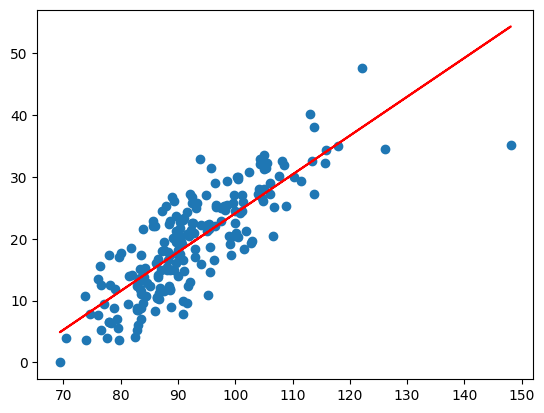

In [182]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -38.6743 + 0.6277*x_train, 'r')

In [183]:
y_train_pred = lr.predict(x_train_sm)

In [184]:
res = y_train - y_train_pred

In [185]:
import numpy as np

In [186]:
np.mean(res)

np.float64(-9.898107761832242e-16)

In [187]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

In [188]:
r2_score(y_test, y_test_pred)

0.6175708364932893

In [189]:
Y2 = df['BodyFat']
X2 = df.drop(['BodyFat'], axis = 1)

In [190]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2, test_size=0.2, random_state = 123)

In [191]:
x_train_sm2 = sm.add_constant(x_train2)

In [192]:
lr2 = sm.OLS(y_train2, x_train_sm2).fit()

In [193]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     45.35
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           9.99e-51
Time:                        08:13:00   Log-Likelihood:                -568.97
No. Observations:                 201   AIC:                             1166.
Df Residuals:                     187   BIC:                             1212.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.1533     18.858     -1.811      0.0

In [194]:
x_test_sm2 = sm.add_constant(x_test2)

In [195]:
y_train_pred2 = lr2.predict(x_test_sm2)

In [196]:
r2_score(y_test2, y_train_pred2)

0.6805842202522523

In [197]:
Y3 = df['BodyFat']
X3 = df[['Weight', 'Abdomen', 'Wrist']]

In [198]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state = 123)

In [199]:
x_train_sm3 = sm.add_constant(x_train3)

In [200]:
lr3 = sm.OLS(y_train3, x_train_sm3).fit()

In [201]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.26e-57
Time:                        08:13:01   Log-Likelihood:                -576.06
No. Observations:                 201   AIC:                             1160.
Df Residuals:                     197   BIC:                             1173.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2498      7.327     -3.992      0.0

In [202]:
x_test_sm3 = sm.add_constant(x_test3)
x_test_sm3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 207 to 150
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   const    51 non-null     float64
 1   Weight   51 non-null     float64
 2   Abdomen  51 non-null     float64
 3   Wrist    51 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [203]:
y_train_pred3 = lr3.predict(x_test_sm3)

In [204]:
r2_score(y_test3, y_train_pred3)

0.6678975557836591